In [1]:
from sklearn.datasets import load_iris
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


In [2]:
# Load the iris dataset
iris = load_iris()
X = iris.data

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


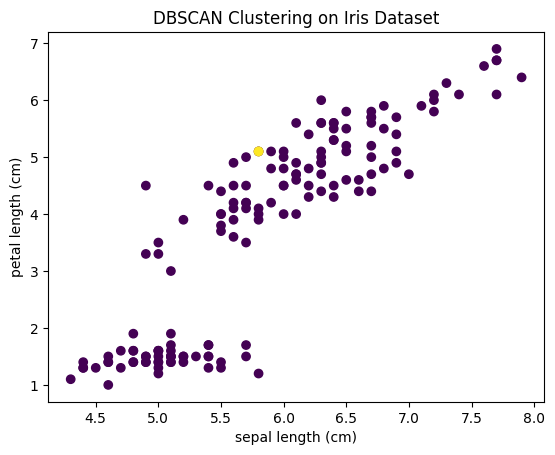

In [3]:
# Create the DBSCAN object
dbscan = DBSCAN(eps=0.1, min_samples=2)

# Fit the model
dbscan.fit(X_scaled)

# Plot the data points with color-coded clusters
plt.scatter(X[:, 0], X[:, 2], c=dbscan.labels_)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[2])
plt.title("DBSCAN Clustering on Iris Dataset")
plt.show()

# DBSCAN vs OPTICS Clustering:

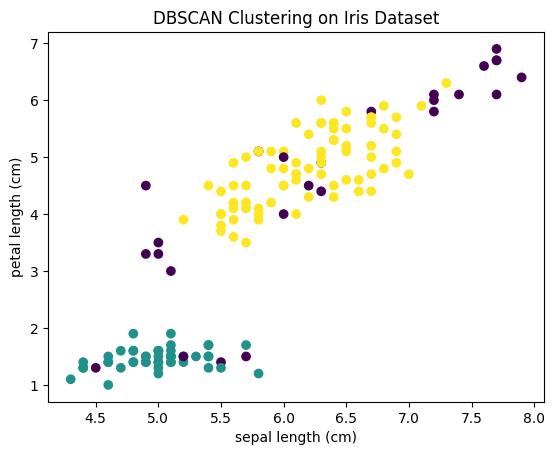

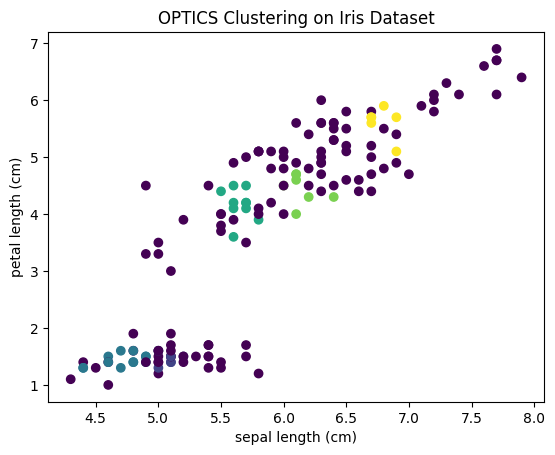

In [4]:
from sklearn.datasets import load_iris
from sklearn.cluster import DBSCAN, OPTICS
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the iris dataset
iris = load_iris()
X = iris.data

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create the DBSCAN object
dbscan = DBSCAN(eps=0.6, min_samples=5)

# Create the OPTICS object
optics = OPTICS(min_samples=5, xi=0.05)

# Fit the models
dbscan.fit(X_scaled)
optics.fit(X_scaled)

# Plot the data points with color-coded clusters for DBSCAN
plt.scatter(X[:, 0], X[:, 2], c=dbscan.labels_)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[2])
plt.title("DBSCAN Clustering on Iris Dataset")
plt.show()

# Plot the data points with color-coded clusters for OPTICS
plt.scatter(X[:, 0], X[:, 2], c=optics.labels_)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[2])
plt.title("OPTICS Clustering on Iris Dataset")
plt.show()


# Hyperparameters for DBSCAN

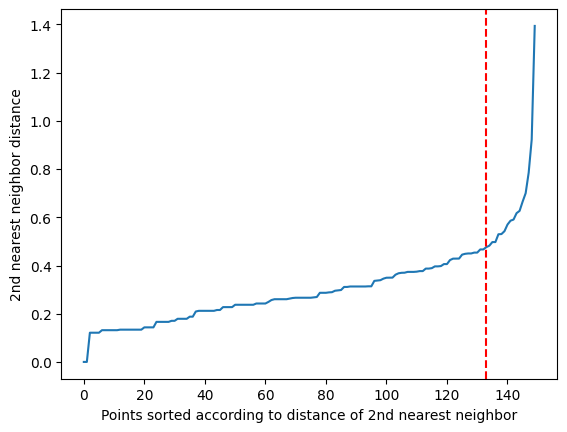

Suggested value of eps: 0.4760712736677158


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from kneed import KneeLocator

# Load the 'iris' dataset
df = sns.load_dataset('iris')

# Normalize the features
features = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].values
features = StandardScaler().fit_transform(features)

# Find the nearest neighbors
neigh = NearestNeighbors(n_neighbors=3)
nbrs = neigh.fit(features)
distances, indices = nbrs.kneighbors(features)

# Sort the distances
distances = np.sort(distances, axis=0)
distances = distances[:,1]

# Identify the "elbow" in the k-distance plot
kneedle = KneeLocator(range(1,len(distances)+1), distances, S=1.0, curve='convex', direction='increasing')
elbow_index = kneedle.elbow

# Plot the k-distance plot
plt.plot(distances)
plt.xlabel('Points sorted according to distance of 2nd nearest neighbor')
plt.ylabel('2nd nearest neighbor distance')

# Add a vertical line at the "elbow" point
plt.axvline(x=elbow_index, color='r', linestyle='--')

plt.show()

# Print the value of 'eps'
print('Suggested value of eps:', distances[elbow_index])